In [10]:
import pandas as pd

df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:

df.columns = [col.strip().lower().replace('-', '_') for col in df.columns]


df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)


df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


df['wait_days'] = (df['appointmentday'] - df['scheduledday']).dt.days


df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})


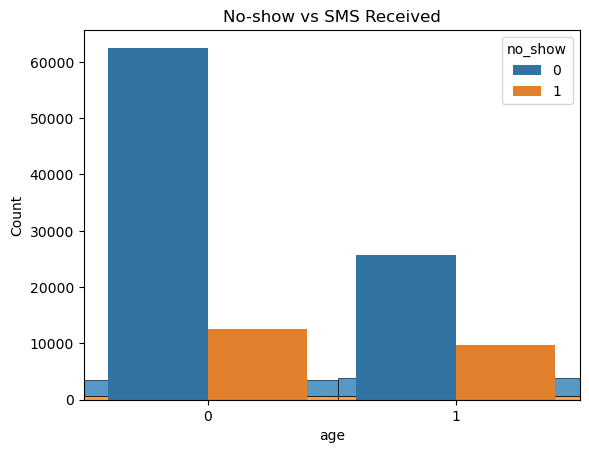

Text(0.5, 1.0, 'No-show by Weekday')

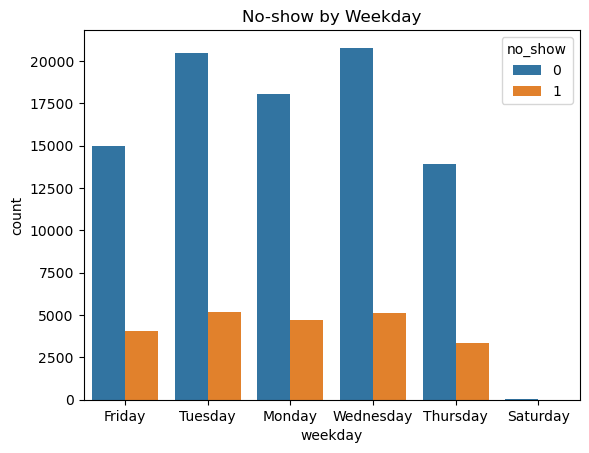

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=df, x='age', hue='no_show', multiple='stack')
plt.title("No-show by Age")


sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title("No-show vs SMS Received")
plt.show()


df['weekday'] = df['appointmentday'].dt.day_name()
sns.countplot(x='weekday', hue='no_show', data=df)
plt.title("No-show by Weekday")


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ['age', 'sms_received', 'wait_days', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap']
X = df[features]
y = df['no_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17667     2]
 [ 4435     2]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.50      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.65      0.50      0.44     22106
weighted avg       0.74      0.80      0.71     22106



In [15]:
df.to_csv("cleaned_noshow_data.csv", index=False)